In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [659]:
data_booking=pd.read_csv("Bookings.csv")
data_session=pd.read_csv("Sessions.csv")


In [661]:
data_booking


,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [663]:
data_session


,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


# Find the number of distinct bookings, sessions, and searches from the given data sets.

In [541]:
#Bookings
data_booking['booking_id'].unique()
len(data_booking['booking_id'].unique())

339

In [543]:
#Sesions
data_session['session_id'].unique()
len(data_session['session_id'].unique())

331

In [545]:
data_session['search_id'].unique()
len(data_session['search_id'].unique())

1360

# How many sesions has more than one booking

In [548]:
# First, delete sesions without booking 
sessions_with_bookings = data_session[data_session['booking_id'].notna()]

In [550]:
# group by session_id and booking_id
session_booking_counts = sessions_with_bookings.groupby('session_id')['booking_id'].count()

In [552]:
session_booking_counts

session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 329, dtype: int64

In [554]:
# Filter sesions with session_booking_counts>1
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]

In [556]:
len(sessions_with_multiple_bookings)

35

# Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?

In [559]:
data_booking['booking_time'] = pd.to_datetime(data_booking['booking_time'])

In [561]:
data_booking['day_of_week'] = data_booking['booking_time'].dt.day_name()

In [563]:
data_booking_day=data_booking.groupby("day_of_week").size()

<Axes: >

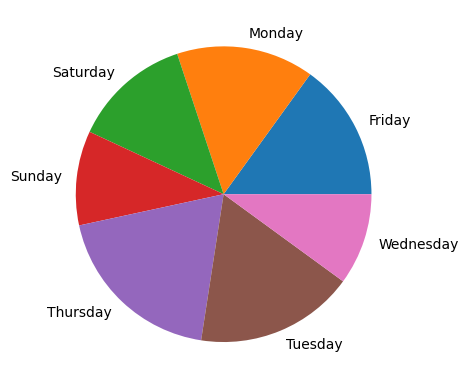

In [565]:
data_booking_day.plot(kind='pie')

In [566]:
data_booking_day

day_of_week
Friday       51
Monday       51
Saturday     44
Sunday       35
Thursday     65
Tuesday      59
Wednesday    34
dtype: int64

# For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [570]:
bookings_costumer = data_booking[data_booking['booking_id'].notna()]

In [572]:
booking_costumer_counts = bookings_costumer.groupby('customer_id')['booking_id'].count()

In [574]:
booking_costumer_counts

customer_id
customer_0      1
customer_1      1
customer_10     1
customer_100    1
customer_101    1
               ..
customer_95     1
customer_96     1
customer_97     4
customer_98     1
customer_99     1
Name: booking_id, Length: 306, dtype: int64

In [576]:
booking_costumer_counts=booking_costumer_counts[booking_costumer_counts>1]

In [578]:
booking_costumer_counts

customer_id
customer_120    2
customer_137    2
customer_144    2
customer_155    2
customer_160    3
customer_176    3
customer_179    2
customer_200    2
customer_217    3
customer_230    3
customer_235    2
customer_237    2
customer_245    2
customer_246    3
customer_247    2
customer_255    2
customer_265    2
customer_28     2
customer_282    2
customer_297    2
customer_33     2
customer_44     2
customer_49     2
customer_67     2
customer_93     2
customer_97     4
Name: booking_id, dtype: int64

In [580]:
customer_ids_multiple = booking_costumer_counts.index

In [582]:
filtered_bookings = data_booking[data_booking['customer_id'].isin(customer_ids_multiple)]

In [584]:
filtered_bookings = data_booking[data_booking['customer_id'].isin(customer_ids_multiple)].copy()
filtered_bookings['route'] = filtered_bookings['from_city'] + ' to ' + filtered_bookings['to_city']

In [586]:
route_counts = filtered_bookings['route'].value_counts()

In [588]:
route_counts

route
Gurgaon to Roissy-en-France         5
Gurgaon to Rāja Sānsi               3
Durlaga to Bhubaneswar              2
Gurgaon to Bagdogra                 2
Bālāpur to Düsseldorf               2
Gurgaon to Bhubaneswar              2
Gurgaon to Paris                    2
Gurgaon to Tiruchi                  2
Devanhalli to Gurgaon               2
Rāja Sānsi to Paris                 1
Jammu to Dubai                      1
Patna to Gurgaon                    1
Ahmedabad to Gwalior                1
Bikaner to Gurgaon                  1
Kolkata to Gurgaon                  1
Delhi to Varanasi                   1
Gurgaon to Dharamsala               1
Gurgaon to Varanasi                 1
Thiruvananthapuram to London        1
Madhyamgram to Frankfurt am Main    1
Varanasi to Delhi                   1
Gurgaon to Mumbai                   1
Gurgaon to Frankfurt am Main        1
Gurgaon to Patna                    1
Rāja Sānsi to Gurgaon               1
Delhi to Jammu                      1
Kochi 

In [590]:
most_booked_route = route_counts.index[0] 

In [592]:
most_booked_route

'Gurgaon to Roissy-en-France'

# Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [595]:
city_departure= data_booking["to_city"].value_counts()
city_departure

to_city
Frankfurt am Main    49
Gurgaon              30
Roissy-en-France     20
Paris                18
Fiumicino            15
                     ..
Amritsar              1
Ikeja                 1
Mérignac              1
Reggio Calabria       1
Luqa                  1
Name: count, Length: 95, dtype: int64

In [597]:
city_departuure_min=city_departure[city_departure>5].index
city_departuure_min

Index(['Frankfurt am Main', 'Gurgaon', 'Roissy-en-France', 'Paris',
       'Fiumicino', 'London', 'Berlin', 'Rāja Sānsi', 'Mumbai', 'Dubai',
       'Milan', 'Varanasi'],
      dtype='object', name='to_city')

In [599]:
filtered_data = data_booking[data_booking['from_city'].isin(city_departuure_min)]

In [601]:
avg_advance_by_city = filtered_data.groupby('from_city')['days_to_departure'].mean()

In [603]:
avg_advance_by_city

from_city
Gurgaon       26.176471
Mumbai        21.764706
Rāja Sānsi     8.823529
Varanasi       9.000000
Name: days_to_departure, dtype: float64

In [605]:
top_3_advance_cities = avg_advance_by_city.sort_values(ascending=False).head(3)

In [607]:
print("Top 3 cities with most advance bookings:")
print(top_3_advance_cities)

Top 3 cities with most advance bookings:
from_city
Gurgaon     26.176471
Mumbai      21.764706
Varanasi     9.000000
Name: days_to_departure, dtype: float64


# Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?

In [610]:
columns=data_booking.columns
columns

Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km',
       'day_of_week'],
      dtype='object')

In [612]:

numerical_cols = data_booking.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km'], dtype='object')


In [614]:
correlation_matrix=data_booking[numerical_cols].corr()
correlation_matrix

,INR_Amount,no_of_passengers,days_to_departure,distance_km
INR_Amount,1.000000,0.397229,0.284534,0.623565
no_of_passengers,0.397229,1.000000,0.187128,0.001698
days_to_departure,0.284534,0.187128,1.000000,0.216972
distance_km,0.623565,0.001698,0.216972,1.000000


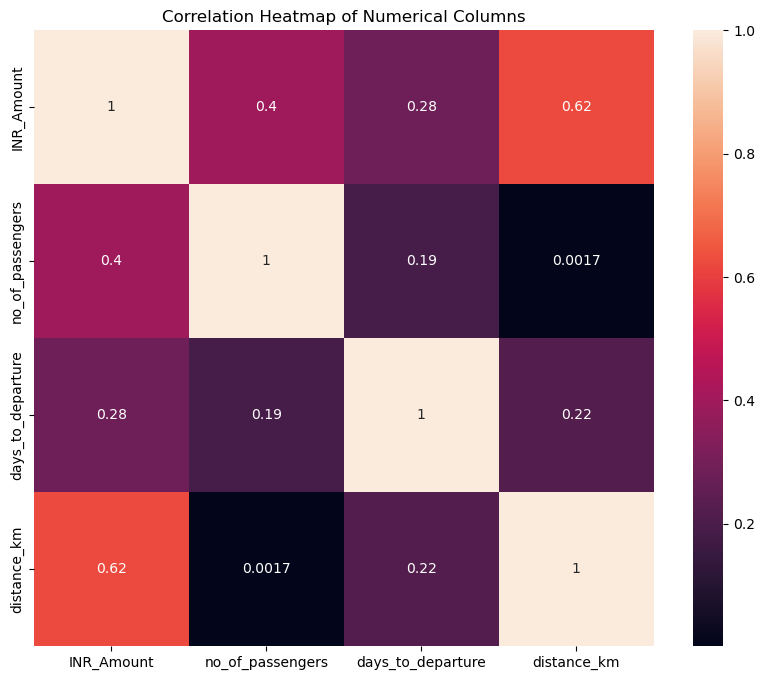

In [616]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [618]:
corr_copy = correlation_matrix.copy()
np.fill_diagonal(corr_copy.values, np.nan)

In [620]:
max_corr = corr_copy.max().max()
print(f"Maximum correlation: {max_corr}")

Maximum correlation: 0.6235653096997817


# For each service, which is the most used device type for making bookings on the platform?

In [623]:
data=data_booking[data_booking["service_name"].notna()]

In [625]:
booking_device_counts = data.groupby('service_name')['device_type_used'].value_counts()

In [627]:
booking_device_counts

service_name  device_type_used
GOIBIBO       IOS                 70
              Desktop             61
              Android             44
              MobileWeb           11
MMT           Desktop             30
              Android              8
              IOS                  5
              MobileWeb            5
YATRA         Desktop             51
              IOS                 22
              Android             18
              MobileWeb           11
              Tablet               3
Name: count, dtype: int64

In [629]:
max_devices = booking_device_counts.groupby('service_name').head(1)
print("Most used device per service:")
print(max_devices)

Most used device per service:
service_name  device_type_used
GOIBIBO       IOS                 70
MMT           Desktop             30
YATRA         Desktop             51
Name: count, dtype: int64


# Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

In [632]:

data_booking['booking_time'] = pd.to_datetime(data_booking['booking_time'])

In [634]:
data_booking['quarter'] = data_booking['booking_time'].dt.to_period('Q')

C:\Users\X\AppData\Local\Temp\ipykernel_6780\2916357987.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [636]:
grouped = data_booking.groupby(['quarter', 'device_type_used']).size().unstack(fill_value=0)

In [638]:
grouped.index = grouped.index.to_timestamp()


<Figure size 1200x600 with 0 Axes>

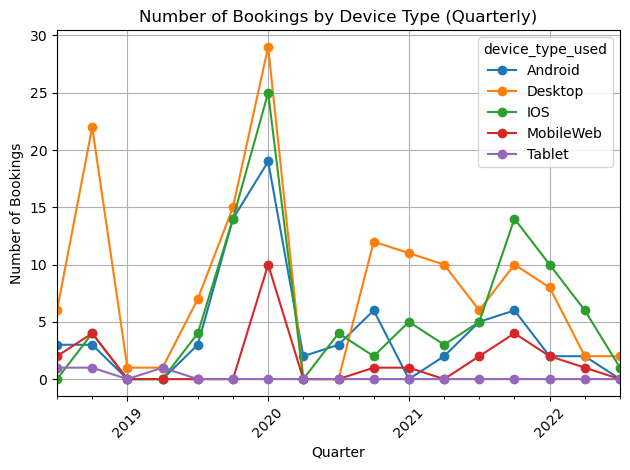

In [640]:
plt.figure(figsize=(12, 6))
grouped.plot(marker='o')
plt.title('Number of Bookings by Device Type (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Consider the following example: 

12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.

Searches = 100 bookings = 10 customers = 12

The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:

What is the average oBSR for each month of the year?

What is the average oBSR for each day of the week?

Plot a time series of oBSR on all the given dates.

In [643]:
data_session['search_time'] = pd.to_datetime(data_session['search_time'], errors='coerce')

data_session['month'] = data_session['search_time'].dt.month
data_session['day_of_week'] = data_session['search_time'].dt.day_name()

In [645]:
data_session['booking_id'] = pd.to_numeric(data_session['booking_id'], errors='coerce')
data_session['search_id'] = pd.to_numeric(data_session['search_id'], errors='coerce')

In [647]:
data_session = data_session.dropna(subset=['booking_id', 'search_id'])

In [649]:
monthly = data_session.groupby('month')[['booking_id', 'search_id']].sum()
monthly['oBSR'] = monthly['booking_id'] / monthly['search_id']
print("Average oBSR by month:")
print(monthly['oBSR'])

Average oBSR by month:
Series([], Name: oBSR, dtype: float64)


In [651]:
print(data_session[['booking_id', 'search_id']].info())
print(data_session[['booking_id', 'search_id']].head())


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   booking_id  0 non-null      float64
 1   search_id   0 non-null      float64
dtypes: float64(2)
memory usage: 0.0 bytes
None
Empty DataFrame
Columns: [booking_id, search_id]
Index: []


In [665]:
print(data_session[['booking_id', 'search_id']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   booking_id  366 non-null    object
 1   search_id   1497 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB
None


In [667]:
print(data_session.info())
print(data_session.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB
None
    session_id   search_id               search_time session_starting_time  \
0  session_322  search_784  2020-01-21T21:35:38.910Z  2020-01-21T21:10:12Z   
1  session_322  search_776  2020-01-21T21:37:37.697Z  2020-01-21T21:10:12Z   
2  session_322  search_623  2020-01-21T21:36:11.392Z  2020-01-21T21:10:12Z   
3  session_322  search_270  2020-01-21T21:16:07.685Z  2020-01-21T21:10:12Z   
4  session_322  search_905  2020-01-21T21:34:55.673Z  2020-01-21T21:10:12Z   

  booking_id  
0      